In [23]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage.transform import resize
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import cv2


In [2]:
About = '''# About the LFW Dataset: LFW is a dataset for face recognition. It contains grayscale images of faces of various people.
Each image is labeled with the name of the person. How People Can Use It: Researchers and developers can use the LFW dataset to train and test face recognition algorithms.
It's a standard benchmark for evaluating the performance of face recognition systems. It can be used to experiment with different machine learning models for facial recognition tasks.
Check the code bellow to undestand the dataset'''
print(About)



# About the LFW Dataset: LFW is a dataset for face recognition. It contains grayscale images of faces of various people.
Each image is labeled with the name of the person. How People Can Use It: Researchers and developers can use the LFW dataset to train and test face recognition algorithms.
It's a standard benchmark for evaluating the performance of face recognition systems. It can be used to experiment with different machine learning models for facial recognition tasks.
Check the code bellow to undestand the dataset


Number of samples: 1288
Number of features: 1850
Number of classes: 7
Image dimensions: (1288, 50, 37)


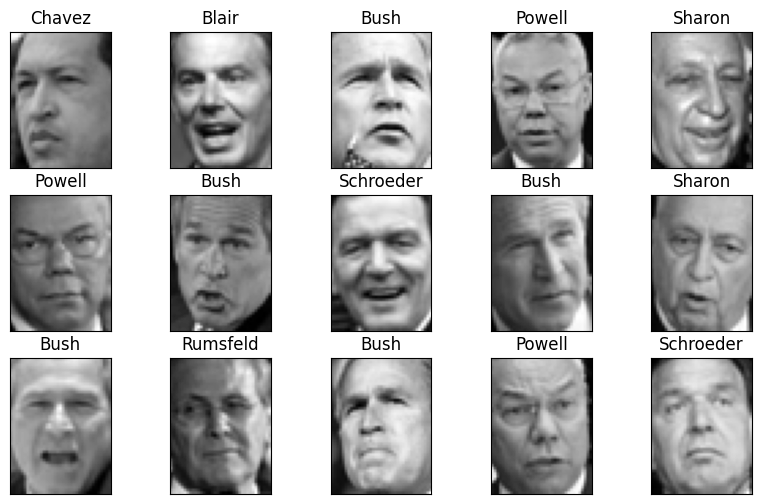

In [3]:

# Load the LFW-a dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Display some information about the dataset
print(f"Number of samples: {len(lfw_people.images)}")
print(f"Number of features: {lfw_people.data.shape[1]}")
print(f"Number of classes: {len(lfw_people.target_names)}")

# Check the dimensions of the images
print(f"Image dimensions: {lfw_people.images.shape}")

# Display some example images
fig, axes = plt.subplots(3, 5, figsize=(10, 6), subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes.ravel()):
    ax.imshow(lfw_people.images[i], cmap='gray')
    ax.set_title(lfw_people.target_names[lfw_people.target[i]].split()[-1])

plt.show()


# Data manipulation for Facial Recognition with CNN
The code bellow will fetch the LFW dataset for a deep learning model, particularly a CNN. It achieves this by partitioning the data into training and testing sets and applying standard preprocessing steps to both the images and labels. 
It will bring only individuals with a ***minimum of 70 images***. Additionally, the images are resized to 40% of their original size. Divides the dataset into **training** and **testing** sets, with **80%** allocated for training and **20%** for testing. The random_state parameter ensures reproducibility. The ultimate objective is likely to train a deep learning model for facial recognition.

In [4]:
# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lfw_people.images, lfw_people.target, test_size=0.2, random_state=42)

# Preprocess the images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
X_test = X_test.astype('float32') / 255

# Preprocess the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### Convolutional Neural Network (CNN) Architecture
### First model

### CNN Architecture

1. Conv(32)-ReLU-MaxPool(2)
2. Conv(64)-ReLU-MaxPool(2)
3. Conv(64)-ReLU-Flatten
4. FC(64)-ReLU, FC(128)-ReLU, FC(64)-ReLU
5. Output(10)-Softmax

### Model Summary:
   - Input: (28,28,1)
   - Total Trainable Params: Varies
   - Output: 10 classes (Softmax)

Check the model bellow:

In [5]:
First_model = models.Sequential()
First_model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
First_model.add(layers.MaxPooling2D((2,2)))
First_model.add(layers.Conv2D(64,(3,3), activation='relu'))
First_model.add(layers.MaxPooling2D((2,2)))
First_model.add(layers.Conv2D(64,(3,3), activation='relu'))
First_model.add(layers.Flatten())
First_model.add(layers.Dense(64, activation = 'relu'))
First_model.add(layers.Dense(128, activation = 'relu'))
First_model.add(layers.Dense(64, activation = 'relu'))
First_model.add(layers.Dense(10, activation= 'softmax'))

First_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
First_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Define the model
Second_model = Sequential()
Second_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
Second_model.add(MaxPooling2D((2, 2)))
Second_model.add(Conv2D(64, (3, 3), activation='relu'))
Second_model.add(MaxPooling2D((2, 2)))
Second_model.add(Conv2D(64, (3, 3), activation='relu'))
Second_model.add(Flatten())
Second_model.add(Dense(64, activation='relu'))
Second_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
Second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
Second_model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = Second_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
17/17 [==============================] - 3s 88ms/step - loss: 1.8159 - accuracy: 0.3757
Epoch 2/5
17/17 [==============================] - 2s 142ms/step - loss: 1.7402 - accuracy: 0.3990
Epoch 3/5
17/17 [==============================] - 1s 79ms/step - loss: 1.7109 - accuracy: 0.3990
Epoch 4/5
17/17 [==============================] - 3s 207ms/step - loss: 1.7120 - accuracy: 0.3990
Epoch 5/5
9/9 [==============================] - 1s 35ms/step - loss: 1.5925 - accuracy: 0.4612
Test accuracy: 46.12%


Epoch 1/5
17/17 [==============================] - 1s 85ms/step - loss: 1.7076 - accuracy: 0.3990 - val_loss: 1.6151 - val_accuracy: 0.4612
Epoch 2/5
17/17 [==============================] - 1s 81ms/step - loss: 1.7026 - accuracy: 0.3990 - val_loss: 1.5995 - val_accuracy: 0.4612
Epoch 3/5
17/17 [==============================] - 1s 82ms/step - loss: 1.7028 - accuracy: 0.3990 - val_loss: 1.6088 - val_accuracy: 0.4612
Epoch 4/5
17/17 [==============================] - 1s 82ms/step - loss: 1.7060 - accuracy: 0.3990 - val_loss: 1.5971 - val_accuracy: 0.4612
Epoch 5/5
17/17 [==============================] - 1s 85ms/step - loss: 1.7087 - accuracy: 0.3990 - val_loss: 1.5939 - val_accuracy: 0.4612


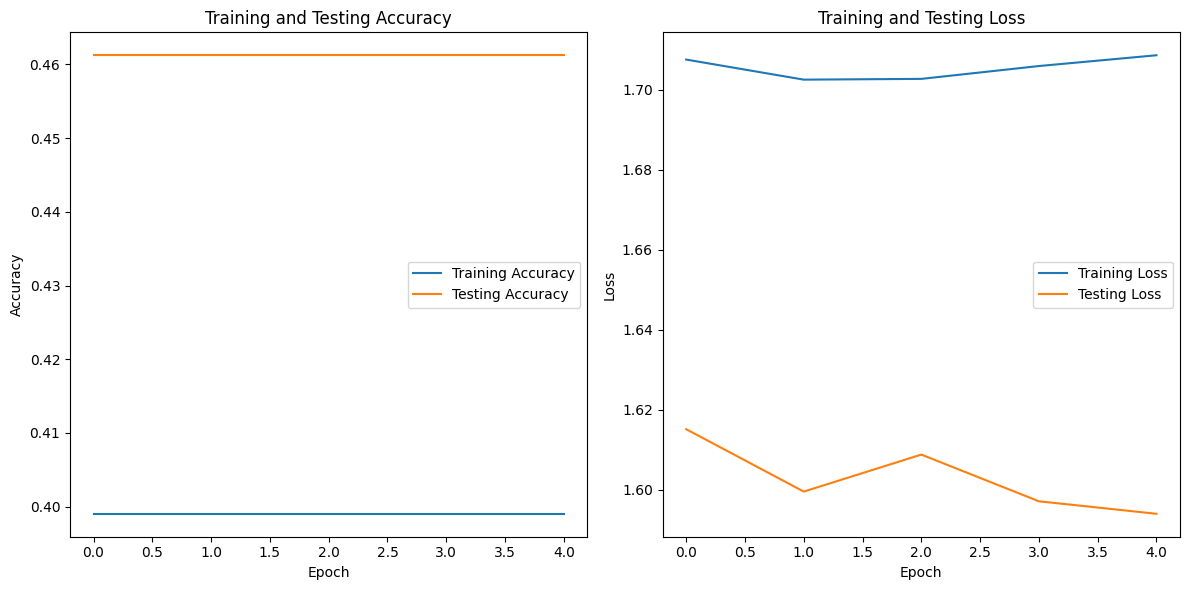

In [42]:
import matplotlib.pyplot as plt

# Fit the model and obtain the training history
history = Second_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
Third_model = Sequential()
Third_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
Third_model.add(MaxPooling2D((2, 2)))
Third_model.add(Conv2D(64, (3, 3), activation='relu'))
Third_model.add(MaxPooling2D((2, 2)))
Third_model.add(Conv2D(64, (3, 3), activation='relu'))
Third_model.add(Flatten())
Third_model.add(Dense(64, activation='relu'))
Third_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

Third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Third_model.fit(X_train, y_train, epochs=5, batch_size=64)

test_loss, test_acc = Third_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
17/17 [==============================] - 3s 76ms/step - loss: 1.8317 - accuracy: 0.3883
Epoch 2/5
17/17 [==============================] - 1s 77ms/step - loss: 1.7088 - accuracy: 0.3990
Epoch 3/5
17/17 [==============================] - 1s 85ms/step - loss: 1.7102 - accuracy: 0.3990
Epoch 4/5
17/17 [==============================] - 2s 114ms/step - loss: 1.7036 - accuracy: 0.3990
Epoch 5/5
9/9 [==============================] - 0s 14ms/step - loss: 1.6163 - accuracy: 0.4612
Test accuracy: 46.12%


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Fourth_model = Sequential()
Fourth_model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
Fourth_model.add(MaxPooling2D((2, 2)))
Fourth_model.add(Conv2D(64, (3, 3), activation='sigmoid'))
Fourth_model.add(MaxPooling2D((2, 2)))
Fourth_model.add(Conv2D(64, (3, 3), activation='sigmoid'))
Fourth_model.add(Flatten())
Fourth_model.add(Dense(128, activation='sigmoid'))
Fourth_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

Fourth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fourth_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)


test_loss, test_acc = Fourth_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/20
17/17 [==============================] - 3s 91ms/step - loss: 1.8416 - accuracy: 0.3699
Epoch 2/20
17/17 [==============================] - 2s 94ms/step - loss: 1.7286 - accuracy: 0.3990
Epoch 3/20
17/17 [==============================] - 2s 89ms/step - loss: 1.7169 - accuracy: 0.3990
Epoch 4/20
17/17 [==============================] - 2s 89ms/step - loss: 1.7152 - accuracy: 0.3990
Epoch 5/20
17/17 [==============================] - 2s 88ms/step - loss: 1.7210 - accuracy: 0.3990
Epoch 6/20
17/17 [==============================] - 2s 94ms/step - loss: 1.7214 - accuracy: 0.3990
Epoch 7/20
17/17 [==============================] - 2s 88ms/step - loss: 1.7257 - accuracy: 0.3990
Epoch 8/20
17/17 [==============================] - 1s 88ms/step - loss: 1.7342 - accuracy: 0.3990
Epoch 9/20
17/17 [==============================] - 2s 96ms/step - loss: 1.7164 - accuracy: 0.3990
Epoch 10/20
17/17 [==============================] - 2s 92ms/step - loss: 1.7089 - accuracy: 0.3990
Epoch 11/

In [51]:
from tensorflow.keras import models, layers

Fifth_model = models.Sequential()
Fifth_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
Fifth_model.add(layers.MaxPooling2D((2, 2)))
Fifth_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
Fifth_model.add(layers.MaxPooling2D((2, 2)))
Fifth_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
Fifth_model.add(layers.Flatten())
Fifth_model.add(layers.Dense(256, activation='relu'))
Fifth_model.add(layers.Dense(512, activation='relu'))
Fifth_model.add(layers.Dense(256, activation='relu'))
Fifth_model.add(layers.Dense(10, activation='softmax'))

Fifth_model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 flatten_18 (Flatten)        (None, 2304)            

Epoch 1/10
17/17 [==============================] - 6s 225ms/step - loss: 1.7851 - accuracy: 0.3835 - val_loss: 1.6111 - val_accuracy: 0.4612
Epoch 2/10
17/17 [==============================] - 4s 210ms/step - loss: 1.7093 - accuracy: 0.3990 - val_loss: 1.5945 - val_accuracy: 0.4612
Epoch 3/10
17/17 [==============================] - 4s 210ms/step - loss: 1.7238 - accuracy: 0.3990 - val_loss: 1.6347 - val_accuracy: 0.4612
Epoch 4/10
17/17 [==============================] - 4s 210ms/step - loss: 1.7306 - accuracy: 0.3990 - val_loss: 1.6444 - val_accuracy: 0.4612
Epoch 5/10
17/17 [==============================] - 3s 204ms/step - loss: 1.7493 - accuracy: 0.3990 - val_loss: 1.6052 - val_accuracy: 0.4612
Epoch 6/10
17/17 [==============================] - 4s 220ms/step - loss: 1.7141 - accuracy: 0.3990 - val_loss: 1.6212 - val_accuracy: 0.4612
Epoch 7/10
17/17 [==============================] - 3s 201ms/step - loss: 1.7098 - accuracy: 0.3990 - val_loss: 1.6050 - val_accuracy: 0.4612
Epoch 

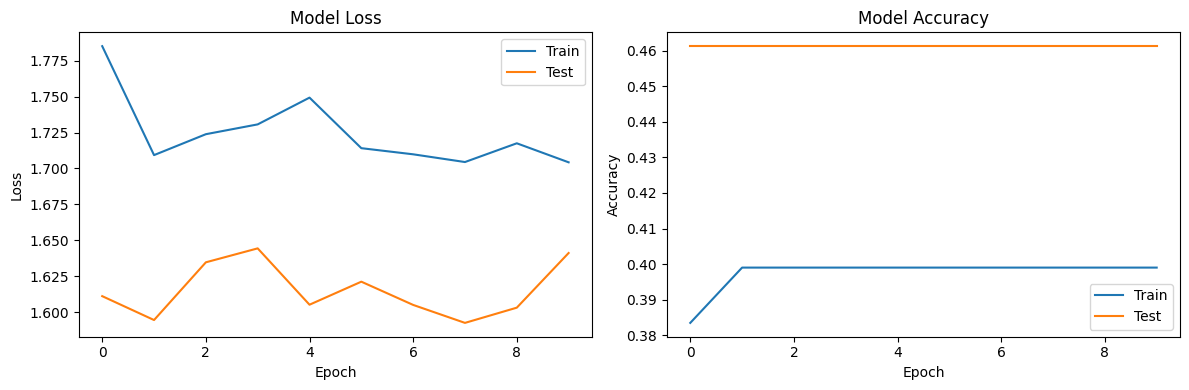

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

# Preprocess the data
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)).astype('float32') / 255
y = to_categorical(y)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Fifth_model
Fifth_model = models.Sequential()
Fifth_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 37, 1)))
Fifth_model.add(layers.MaxPooling2D((2, 2)))
Fifth_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
Fifth_model.add(layers.MaxPooling2D((2, 2)))
Fifth_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
Fifth_model.add(layers.Flatten())
Fifth_model.add(layers.Dense(256, activation='relu'))
Fifth_model.add(layers.Dense(512, activation='relu'))
Fifth_model.add(layers.Dense(256, activation='relu'))
Fifth_model.add(layers.Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
Fifth_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history = Fifth_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()


Epoch 1/10
17/17 [==============================] - 6s 240ms/step - loss: 1.7808 - accuracy: 0.3990 - val_loss: 1.6487 - val_accuracy: 0.4612
Epoch 2/10
17/17 [==============================] - 4s 221ms/step - loss: 1.7521 - accuracy: 0.3990 - val_loss: 1.6490 - val_accuracy: 0.4612
Epoch 3/10
17/17 [==============================] - 4s 233ms/step - loss: 1.7251 - accuracy: 0.3990 - val_loss: 1.6509 - val_accuracy: 0.4612
Epoch 4/10
17/17 [==============================] - 4s 222ms/step - loss: 1.7409 - accuracy: 0.3990 - val_loss: 1.6441 - val_accuracy: 0.4612
Epoch 5/10
17/17 [==============================] - 4s 228ms/step - loss: 1.7286 - accuracy: 0.3990 - val_loss: 1.6392 - val_accuracy: 0.4612
Epoch 6/10
17/17 [==============================] - 4s 226ms/step - loss: 1.7208 - accuracy: 0.3990 - val_loss: 1.6335 - val_accuracy: 0.4612
Epoch 7/10
17/17 [==============================] - 4s 229ms/step - loss: 1.7253 - accuracy: 0.3990 - val_loss: 1.6027 - val_accuracy: 0.4612
Epoch 

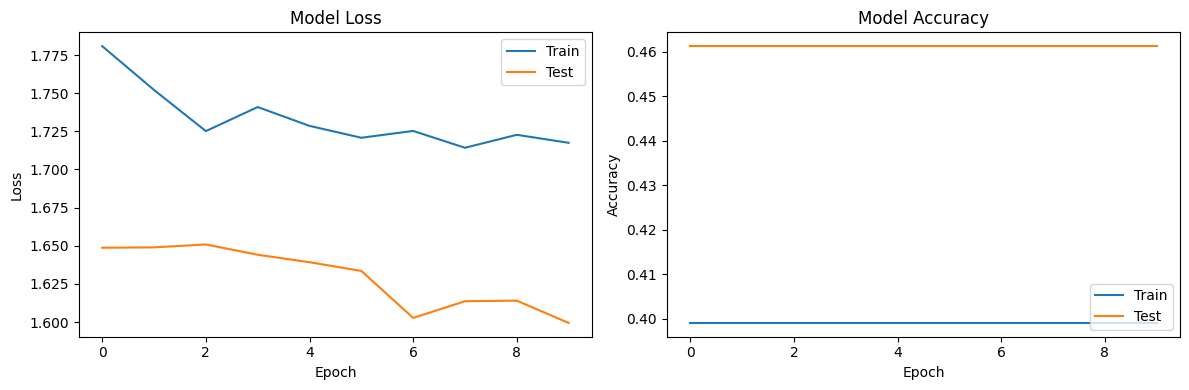

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

# Preprocess the data
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)).astype('float32') / 255
y = to_categorical(y)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the sixth_model
sixth_model = models.Sequential()
sixth_model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', input_shape=(50, 37, 1)))
sixth_model.add(layers.MaxPooling2D((2, 2)))
sixth_model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
sixth_model.add(layers.MaxPooling2D((2, 2)))
sixth_model.add(layers.Conv2D(256, (3, 3), activation='sigmoid'))
sixth_model.add(layers.Flatten())
sixth_model.add(layers.Dense(256, activation='sigmoid'))
sixth_model.add(layers.Dense(512, activation='sigmoid'))
sixth_model.add(layers.Dense(256, activation='sigmoid'))
sixth_model.add(layers.Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
sixth_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_sixth = sixth_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_sixth.history['loss'])
plt.plot(history_sixth.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_sixth.history['accuracy'])
plt.plot(history_sixth.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()
